### Description des Données
* Variables prédictives (ou indépendantes) :

- age : Âge du bénéficiaire principal.
- sex : Sexe du bénéficiaire (male/female).
- bmi : Indice de masse corporelle (BMI) qui permet de catégoriser si une personne est en sous-poids, poids normal, surpoids, ou obèse.
- children : Nombre d'enfants ou de personnes à charge couvertes par l'assurance maladie.
- smoker : Statut de fumeur (yes/no).
- region : Région de résidence du bénéficiaire dans l'US (northeast, northwest, southeast, southwest).
- Variable à prédire (ou dépendante) :




In [1]:
# Importer les librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preparation

In [2]:
# importation de donnes 
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

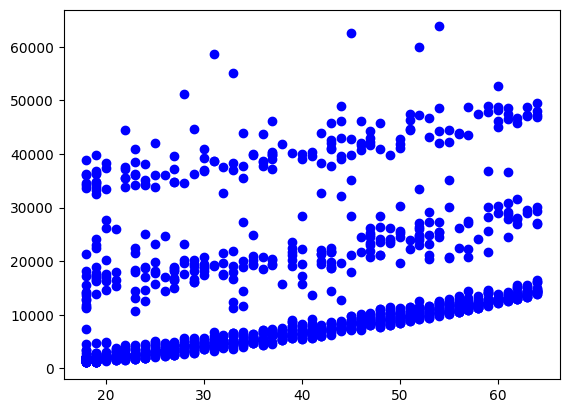

In [8]:
# Visualiser le scatter plot des charges en fonction de l'age
plt.scatter(data.age.values, data.charges.values, color = 'b')
plt.show()

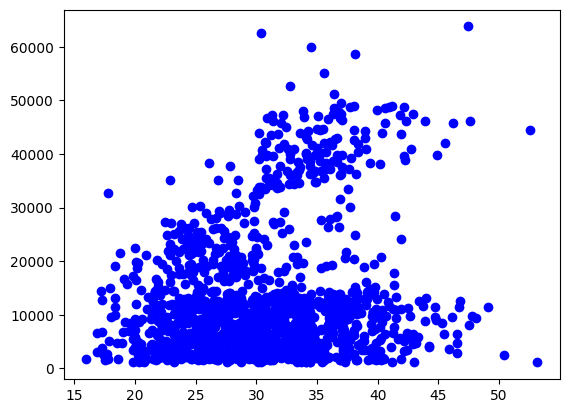

In [9]:
# Visualiser le scatter plot des charges en fonction de bmi
plt.scatter(data.bmi.values, data.charges.values, color = 'b')
plt.show()

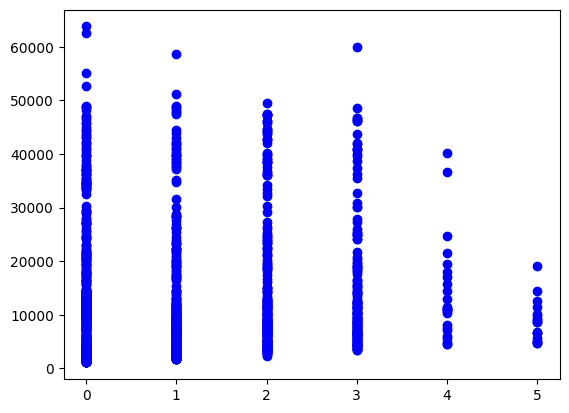

In [10]:
# Visualiser le scatter plot des charges en fonction de bmi
plt.scatter(data.children.values, data.charges.values, color = 'b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Séparer les variables prédictives et la variable cible
X = data.drop('charges', axis=1)
y = data['charges']

In [12]:
# Encodage des variables catégorielles
categorical_features = ['sex', 'smoker', 'region']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

In [13]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Afficher les dimensions
print("Dimension des données train:  ", X_train.shape, y_train.shape)
print("Dimension des données test:  ", X_test.shape, y_test.shape)


Dimension des données train:   (1070, 6) (1070,)
Dimension des données test:   (268, 6) (268,)


### Entraînement des modèles de régression multiple

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# # Créer une pipeline pour la régression multiple
model_multiple = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [16]:
# Entraîner le modèle
model_multiple.fit(X_train, y_train)



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [17]:
# Faire des prédictions
y_pred_multiple = model_multiple.predict(X_test)

# Afficher les premières prédictions pour vérification
print("Premières prédictions : ", y_pred_multiple[:5])

Premières prédictions :  [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]


In [18]:
print("Taille de y_test :", len(y_test))
print("Taille de y_pred_multiple :", len(y_pred_multiple))

Taille de y_test : 268
Taille de y_pred_multiple : 268


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_multiple)
mae = mean_absolute_error(y_test, y_pred_multiple)
r2 = r2_score(y_test, y_pred_multiple)

print(f"Régression Multiple - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

Régression Multiple - MSE: 33596915.85, MAE: 4181.19, R²: 0.78


### Entraînement des modèles de régression Ridge

In [20]:
from sklearn.linear_model import Ridge

# Entraîner une régression Ridge
model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])


In [21]:
model_ridge.fit(X_train, y_train)


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', Ridge())])

In [22]:
# Faire des prédictions
y_pred_ridge = model_ridge.predict(X_test)

# Afficher les premières prédictions pour vérification
print("Premières prédictions : ", y_pred_ridge[:5])

Premières prédictions :  [ 8980.22899525  7078.96608405 36797.97785131  9468.72623903
 26920.59698573]


In [23]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Régression Multiple - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

Régression Multiple - MSE: 33619947.01, MAE: 4187.30, R²: 0.78



### Entraînement des modèles de régression Lasso

In [24]:
from sklearn.linear_model import Lasso

# Entraîner une régression Lasso
model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])


In [25]:
model_lasso.fit(X_train, y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', Lasso(alpha=0.1))])

In [26]:
# Faire des prédictions
y_pred_lasso = model_lasso.predict(X_test)

# Afficher les premières prédictions pour vérification
print("Premières prédictions : ", y_pred_lasso[:5])

Premières prédictions :  [ 8969.39804844  7068.58957734 36857.5831895   9454.74229459
 26972.82368271]


In [27]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f"Régression Multiple - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

Régression Multiple - MSE: 33597166.32, MAE: 4181.25, R²: 0.78


- Évaluation des modèles

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Évaluer les modèles
results = {
    'Multiple Regression': evaluate_model(y_test, y_pred_multiple),
    'Ridge Regression': evaluate_model(y_test, y_pred_ridge),
    'Lasso Regression': evaluate_model(y_test, y_pred_lasso)
}

# Afficher les résultats
for model_name, metrics in results.items():
    mse, mae, r2 = metrics
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

Multiple Regression - MSE: 33596915.85, MAE: 4181.19, R²: 0.78
Ridge Regression - MSE: 33619947.01, MAE: 4187.30, R²: 0.78
Lasso Regression - MSE: 33597166.32, MAE: 4181.25, R²: 0.78


### Choix du model le plus performant

In [36]:
# Le modèle qui a  le R² le plus élevé est le meilleur
best_model_name = max(results, key=lambda k: results[k][2])
best_model = {
    'Ridge Regression': model_ridge,
    'Multiple Regression': model_multiple,
    'Lasso Regression': model_lasso
}[best_model_name]

print(f"Le meilleur modèle est : {best_model_name}")


Le meilleur modèle est : Multiple Regression


In [43]:
import joblib
joblib.dump(model_multiple,"mm_model.pkl")

['mm_model.pkl']

In [42]:
new_data = pd.DataFrame({
    'age': [45],
    'sex': ['male'],
    'bmi': [34.0],
    'children': [10],
    'smoker': ['yes'],
    'region': ['southeast']
})

# Faire des prédictions avec le meilleur modèle
new_prediction = best_model.predict(new_data)
print(f"Prédiction pour les nouvelles données : {new_prediction[0]:.2f}")

Prédiction pour les nouvelles données : 38321.30
